[View in Colaboratory](https://colab.research.google.com/github/monimoyd/1stDNN/blob/master/1stDNN_Monimoy_Changes_98_96.ipynb)

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D,AveragePooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


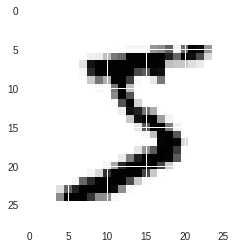

In [70]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [73]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [75]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [76]:
from keras.layers import Activation
from keras.layers import AveragePooling2D
model = Sequential()


model.add(Convolution2D(64, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 1, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(16, 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 3, 3, activation='relu'))
model.add(Convolution2D(10, 3, 3, activation='relu'))
model.add(Convolution2D(10, 3, 3, activation='relu'))
model.add(Convolution2D(10, 3, 3, activation='relu'))
model.add(AveragePooling2D())
model.add(Convolution2D(10, 1))


model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserW

In [78]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 26, 26, 32)        2080      
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 24, 24, 16)        528       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 10, 10, 16)        2320      
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 10, 10, 10)        170       
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [80]:
model.fit(X_train, Y_train, batch_size=2048, nb_epoch=150, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/150
60000/60000 [==============================] - 7s 110us/step - loss: 2.1219 - acc: 0.2211
Epoch 2/150
60000/60000 [==============================] - 6s 92us/step - loss: 1.3695 - acc: 0.5120
Epoch 3/150
60000/60000 [==============================] - 6s 92us/step - loss: 0.9436 - acc: 0.6881
Epoch 4/150
60000/60000 [==============================] - 6s 92us/step - loss: 0.6726 - acc: 0.7918
Epoch 5/150
60000/60000 [==============================] - 6s 92us/step - loss: 0.4450 - acc: 0.8670
Epoch 6/150
60000/60000 [==============================] - 6s 92us/step - loss: 0.3310 - acc: 0.9020
Epoch 7/150
60000/60000 [==============================] - 6s 93us/step - loss: 0.2665 - acc: 0.9207
Epoch 8/150
60000/60000 [==============================] - 6s 92us/step - loss: 0.2312 - acc: 0.9312
Epoch 9/150
60000/60000 [==============================] - 6s 93us/step - loss: 0.1946 - acc: 0.9420
Epoch 10/150
60000/60000 [==============================] - 6s 93us/step - loss: 0.1758 - 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [82]:
print(score)

[0.03533929381113994, 0.9896]


In [0]:
y_pred = model.predict(X_test)

In [84]:
print(y_pred[:9])
print(y_test[:9])

[[4.95356100e-12 3.49559812e-08 2.26298297e-07 1.78332982e-06
  7.07669822e-16 2.67919172e-12 1.09068085e-21 9.99997973e-01
  2.59043459e-12 6.82604737e-11]
 [3.63141362e-06 1.07943433e-05 9.99985576e-01 4.57149696e-08
  3.53511664e-10 3.50122487e-09 1.45879913e-08 2.53635113e-10
  1.02193569e-08 1.89648220e-14]
 [2.46600198e-08 9.99968648e-01 5.27822976e-07 1.17593650e-07
  5.91612448e-09 2.70496257e-05 3.37414372e-06 2.38830978e-07
  4.75926747e-08 1.49681316e-08]
 [9.99926805e-01 3.02223052e-10 1.12429257e-08 2.66556762e-14
  9.58145854e-11 6.23238011e-05 1.08704535e-05 1.15117889e-11
  6.21392138e-09 7.64433228e-09]
 [1.19750848e-13 4.59758360e-12 3.74009261e-15 7.24467348e-14
  9.99999523e-01 3.71890756e-12 4.87596161e-12 2.44785203e-13
  3.36561681e-11 5.15697991e-07]
 [6.72107592e-10 9.99999046e-01 5.09319591e-08 3.50835611e-10
  1.72180847e-09 8.41109056e-07 4.29469686e-08 4.01689562e-08
  1.15139487e-09 7.09101267e-09]
 [2.30166677e-15 1.90795461e-07 1.10184244e-10 1.92525537e